In [15]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [2]:
# prior hyperpameters
alpha = 1
beta = 1

In [3]:
# Field goal rate data. Each tuple contains (field goals made, field goals attempted).
player_field_goal_data = {
    # http://www.espn.com/nba/player/gamelog/_/id/2594922/year/2018/otto-porter-jr
    'Otto Porter Jr': [(0, 0), (4, 9), (4, 8), (3, 7), (5, 10), (4, 7), (0, 0), (5, 8), (4, 9)],
    # http://www.espn.com/nba/player/gamelog/_/id/3024/year/2018/jj-redick
    'JJ Redick': [(5, 13), (3, 11), (6, 15), (9, 17), (7, 13), (6, 13), (8, 18), (4, 9), (4, 13)],
    # http://www.espn.com/nba/player/gamelog/_/id/3213/year/2018/al-horford
    'Al Horford': [(7, 12), (2, 8), (4, 9), (5, 13), (2, 4), (5, 13), (8, 10), (7, 16), (4, 6)],
}

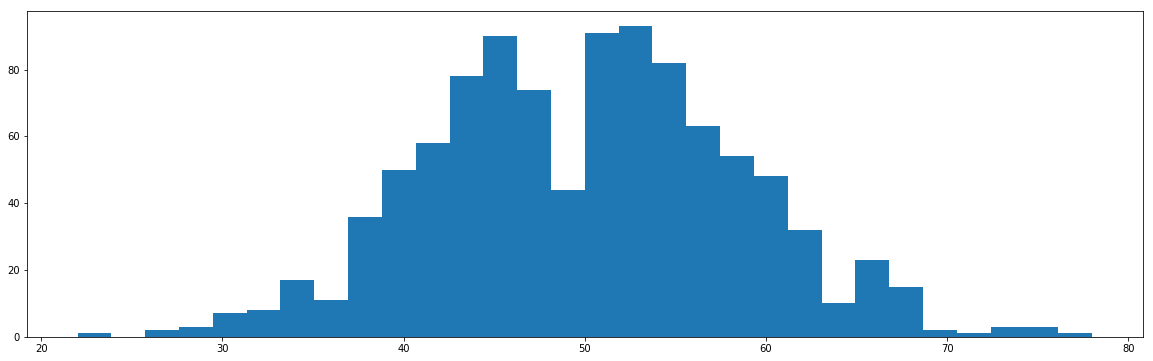

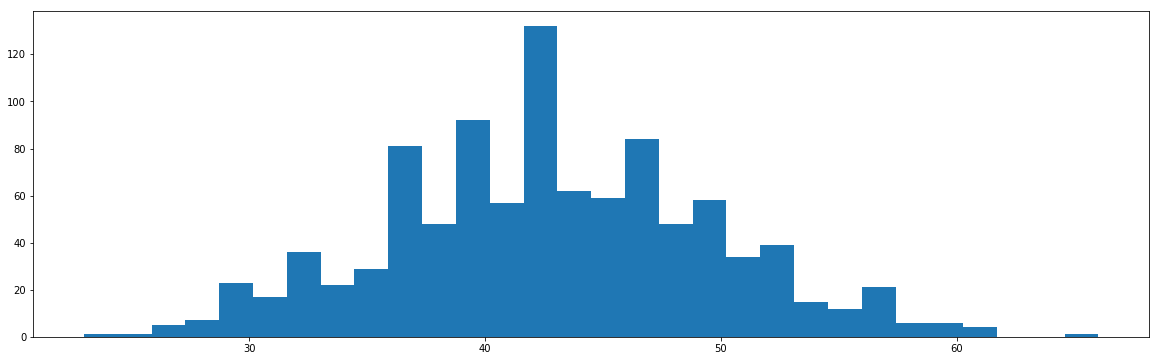

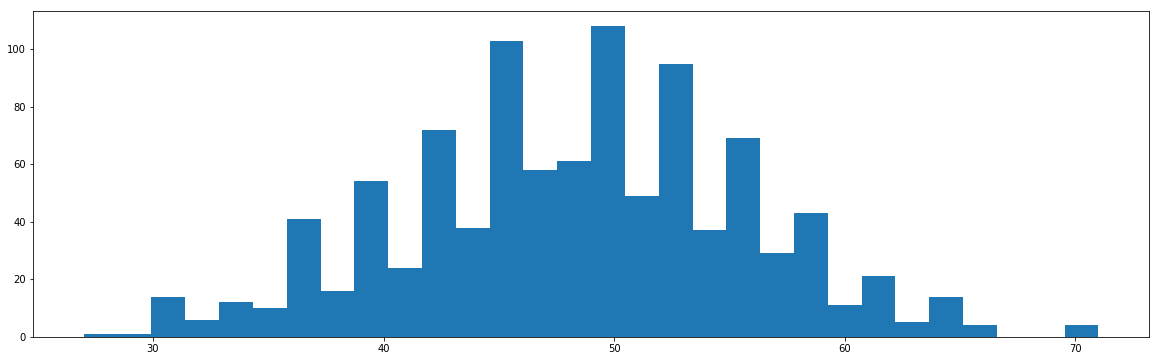

In [25]:
n_attempts = 100
n_samples = 1000

for player in player_field_goal_data.keys():
    plt.figure(figsize=(20, 6))
    
    # Prior: Beta distribution
    alpha_prior = 1
    beta_prior = 1
    prior_field_goal_rate = sts.beta(alpha_prior, beta_prior)

    # Likelihood: Binomial distribution
    total_successes = sum(game[0] for game in player_field_goal_data[player])
    total_failures = sum(game[1] - game[0] for game in player_field_goal_data[player])

    # Posterior: Beta distribution
    alpha_post = alpha_prior + total_successes
    beta_post = beta_prior + total_failures
    posterior_field_goal_rate = sts.beta(alpha_post, beta_post)
    
    probabities_of_goal = posterior_field_goal_rate.rvs(n_samples)
    posterior_total_goals = sts.binom(n_attempts, probabities_of_goal).rvs(n_samples)
    plt.hist(posterior_total_goals, bins=30)
    plt.title('Number of goals in {}')

plt.show()